# Installing OpenAI Gym and Stable Baselines

In [ ]:
# Install super mario game environment and NES emulator and OpenAI Gym interface
!pip install gym_super_mario_bros==7.3.0 
!pip install nes_py

In [ ]:
# install stable baselines for RL algorithms
!pip install stable_baselines3[extra]  # current version

# Setup Mario

In [4]:
# Import game
import gym_super_mario_bros

# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace

# Import simplified controls for AI to learn faster
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [5]:
# check Actions
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [6]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)  # simplifies actions

In [7]:
env.action_space

Discrete(7)

In [8]:
env.observation_space

Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
 

In [9]:
print(env.observation_space.shape)

(240, 256, 3)


In [ ]:
# Create a flag- restart or not
done = True
# Loop through each frame in the game
for frame in range(100000):
    if done:
        # Start or restart the game
        env.reset()
    # Pass an action for the game randomly: left, right, etc. from SIMPLE_MOVEMENT
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Closes the game
env.close()

# Preprocess Environment

In [11]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation

# Import  Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

# Import Matplotlib to show impact of frame stacking
from matplotlib import pyplot as plt

GrayScaleObservation - converts colored frames into grayscale to cut down on computation time and making the training faster

VecFrameStack - capture several frames while playing the game, vectorize and stack them together. AI will be able to see the actions taken for those frames and learn from them

DummyVecEnv -  wrap stacked frames with the dummy vector environment created for stable baseline and train agent in multiple environments at the same time

In [12]:
# Setup the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')  # standard version

In [13]:
# Simplify the controls or actions
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [14]:
state = env.reset()

In [15]:
state.shape

(240, 256, 3)

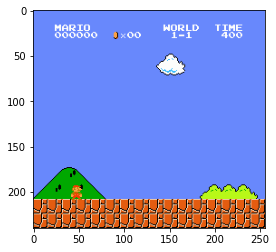

In [16]:
# Show original game frame
plt.imshow(state)

In [17]:
# Convert to gray scale to minimize data for preprocessing
env= GrayScaleObservation(env, keep_dim=True)  # keep dimension to be able to apply stacking

In [18]:
state = env.reset()

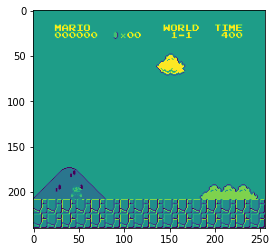

In [19]:
# Show game frome after gray scale convertion
plt.imshow(state)

In [20]:
state.shape

(240, 256, 1)

In [21]:
# Wrap inside the Dummy environment
env = DummyVecEnv([lambda: env])

In [22]:
state = env.reset()
state.shape

(1, 240, 256, 1)

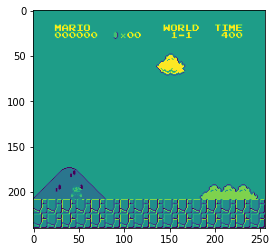

In [23]:
# Show game frame after dummy environment vectorization
plt.imshow(state[0])

In [24]:
# Stack 4 different frames or images together and apply channel order to last.
env = VecFrameStack(env, 4, channels_order='last')  

In [25]:
state = env.reset()
state.shape

(1, 240, 256, 4)

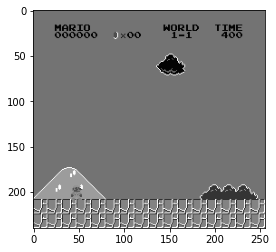

In [26]:
# Show game frome after stacking frames
plt.imshow(state[0])

In [27]:
state, reward, done, info = env.step([env.action_space.sample()])

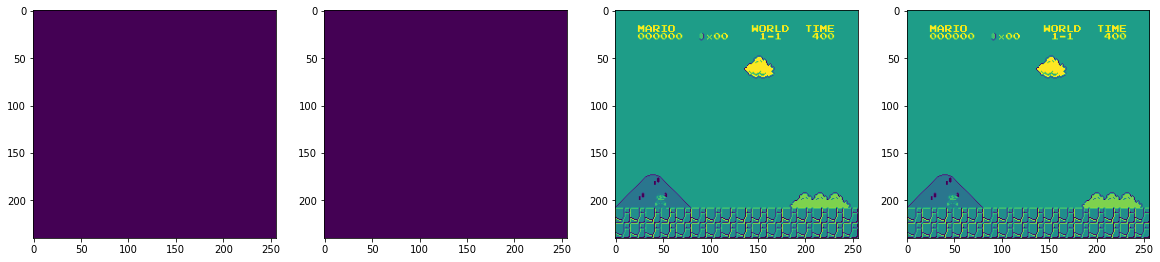

In [28]:
# Show game frame after stacking
plt.figure(figsize=(20,16))
for i in range(state.shape[3]):
    plt.subplot(1,4,i+1)
    plt.imshow(state[0][:,:,i])
plt.show()

In [29]:
state = env.reset()

In [30]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [31]:
state, reward, done, info = env.step([5])  # run several times to show mario jumping

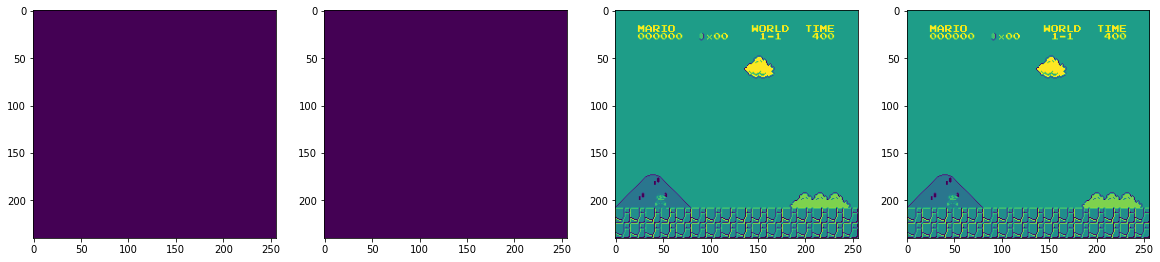

In [32]:
# Show game frome after stacking frames
plt.figure(figsize=(20,16))
for i in range(state.shape[3]):
    plt.subplot(1,4,i+1)
    plt.imshow(state[0][:,:,i])
plt.show()

# Train the model

In [33]:
# Import os for file path management
import os

# import algorithm used for training the model
from stable_baselines3 import PPO

In [34]:
# Save training parameters, results, and logs
log_path = os.path.join('Training', 'Logs')

# Create a Reinforcement Learning AI model
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=log_path, learning_rate=0.000001, n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
model.learn(total_timesteps=10000)  # change to higher value for better results - may take hours without GPU

# Save the model

In [ ]:
model.save('mario_model_10000')

# Load the model

In [ ]:
model = PPO.load('mario_model_10000')

# Test the model

In [ ]:
state = env.reset()
while True:
    actions, _ = model.predict(state)
    state, reward, done, info = env.step(actions)
    env.render()